In [10]:
%matplotlib ipympl
import glob, os, sys, datetime
import numpy as np
import matplotlib.pyplot as plt
from pianoq_results.scan_result import ScanResult
from pianoq_results.misc import my_mesh
from pianoq.misc.mplt import mimshow
from pianoq.simulations.mplc_sim.mplc_sim_result import MPLCSimResult
dir_path = r'G:\My Drive\Projects\MPLC\results\lab\2024_09_17_first_diffuser'
d_no = 1 

# Goals 
We want to get to a place where we are able to perform the scaling experiment. For this, we want to:
- understand where exactly my diffusers send the light in comparison to simulation with WFM 
- see the amount of counts we have in the two-photon measurements 
- get an even better understanding of the correction phase on plane 1:
    - do opposite phases on correlated modes really cancel out? 
    - try and measure cleverly the correction phases 

# Single counts
I performed rough large scans to see where the photons actually hit in both detectors. At the top of the signal scan you see the edge of the idler, and in the bottom of the idler scan you see the edge of the signal. 

Text(0.5, 1.0, 'Singles signal')

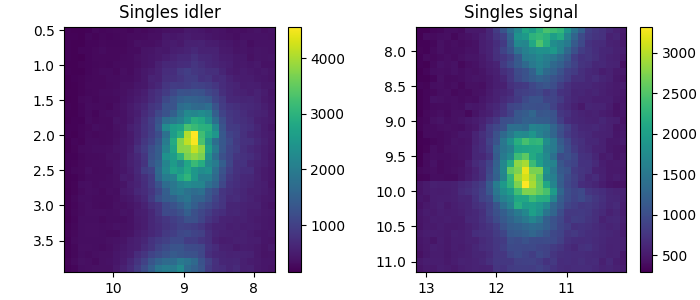

In [23]:
singles_sig_path = glob.glob(rf'{dir_path}\*singles_signal*.scan')[0]
singles_idl_path = glob.glob(rf'{dir_path}\*singles_idler*.scan')[0]
s_sig = ScanResult()
s_sig.loadfrom(singles_sig_path)
s_idl = ScanResult()
s_idl.loadfrom(singles_idl_path)

fig, axes = plt.subplots(1, 2, figsize=(7, 3), constrained_layout=True)
my_mesh(s_idl.X, s_idl.Y, s_idl.single1s, axes[0])
axes[0].invert_xaxis()
axes[0].set_title('Singles idler')

my_mesh(s_sig.X, s_sig.Y, s_sig.single2s, axes[1])
axes[1].invert_xaxis()
axes[1].set_title('Singles signal')

This is compared to the expected incoherent some of the different speckle counts in the simulation (that originated only from 4 spots):

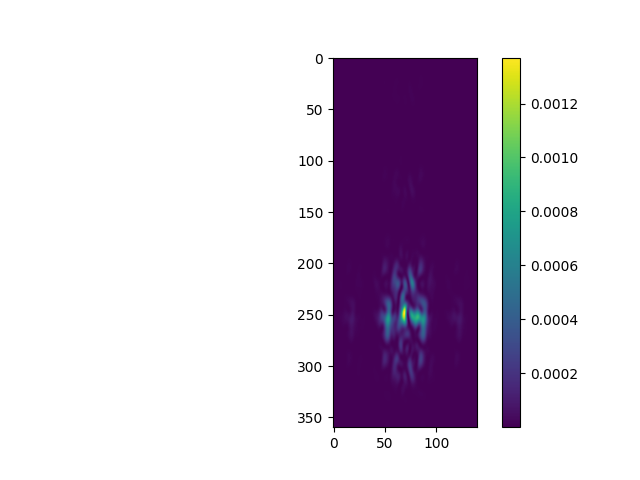

(<Figure size 640x480 with 2 Axes>, <AxesSubplot: >)

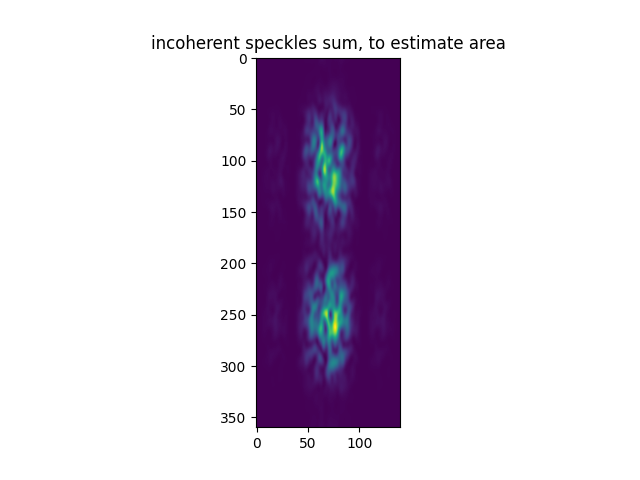

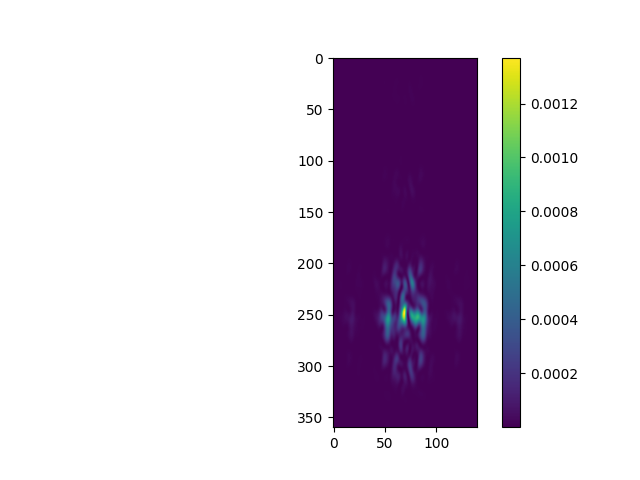

In [22]:
sim_res_path = glob.glob(rf'{dir_path}\*diffuser*d{d_no}d*.mplcsim')[0]
sr = MPLCSimResult()
sr.loadfrom(sim_res_path)
output_speckle_modes = np.arange(0, 8)
all_speckles = sr.backward_fields[-1, output_speckle_modes]
fig, ax = plt.subplots()
ax.imshow((np.abs(all_speckles)**2).sum(axis=0)[sr.active_slice])
ax.set_title('incoherent speckles sum, to estimate area')

mimshow((np.abs(all_speckles[0])**2)[sr.active_slice])